<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/04-EDA.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 04-EDA

Exploratory data analysis (EDA)

* Conceptual reference
  * [Chapter 7](https://r4ds.had.co.nz/exploratory-data-analysis.html) in *R for Data Science* (2017) by Wickham & Grolemund.
* Technical references (data viz with the [seaborn API](https://seaborn.pydata.org/api.html))
  * [seaborn scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
  * [seaborn catplot](https://seaborn.pydata.org/tutorial/categorical.html) -- categorical data
  * [visualizing regression models](https://seaborn.pydata.org/tutorial/regression.html) -- tutorial
  * [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) -- regression models

# Diamonds dataset

A case study

The diamonds dataset is a collection of ~54,000 diamonds.

Measurements of each diamond include: price, carat, color, clarity, and cut.


It is one of the several ggplot2 datasets. 

* [diamonds dataset](https://ggplot2.tidyverse.org/reference/diamonds.html) (overview) -- tidyverse.org
* [diamonds.csv](https://github.com/tidyverse/ggplot2/tree/master/data-raw) (ggplot2 data repository) -- github



# Load the data

* Is the dataset tidy?
* What if we want to investigate price vs cut?

In [1]:
import pandas as pd

In [2]:
# load the diamonds dataset from the ggplot2 repo
url = "https://github.com/tidyverse/ggplot2/raw/master/data-raw/diamonds.csv"
diamonds = pd.read_csv(url)

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Visualize the dataset

Price (quantitative) vs cut (categorical)

* [Matplotlib bar chart](https://matplotlib.org/stable/gallery/ticks_and_spines/custom_ticker1.html)

In [3]:
# Get the cuts
cuts = diamonds['cut'].unique()
cuts

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [4]:
# Get the average price, faceted by cut.
# We'll do more with relational data next week. Consider this a preview.
diamonds.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


In [5]:
# Average price for each "cut"
average_price = diamonds.groupby('cut').mean()['price']
average_price

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

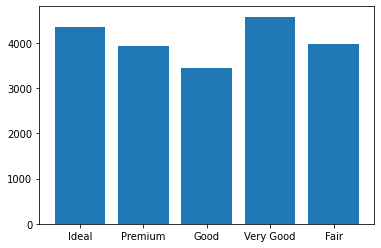

In [6]:
# Simple bar chart with matplotlib
import matplotlib.pyplot as plt

plt.bar(cuts, average_price);

## Q: What's wrong with the chart above?

Hint: there's bug, but it didn't throw an error.

# EXERCISE 

Find the bug.  Extra credit: fix the bug.

## A.2: Vertical axis isn't labeled

Simple bar chart with nicely labeled tick marks...

https://matplotlib.org/stable/gallery/ticks_and_spines/custom_ticker1.html

# A digression on axis labels

## Learning goals

* Practical application of convenience functions
* Customizing tick marks
* What to do when an example from the matplotlib docs throws an error

## References

* [Custom tick labels](https://matplotlib.org/stable/gallery/ticks_and_spines/custom_ticker1.html) -- matplotlib.org
  * Try this example.
  * Note: It doesn't work (by default, in Colab as of 1 Jun 2021)
* [Fancy tick formats](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html#Fancy-Tick-Formats) (04.12 of VanderPlas) -- jakevdp.github.io
  *  `plt.FuncFormatter(format_func)`
  * `millions` to `plt.FuncFormatter(millions)`


In [7]:
# This demo -- straight from the documentation -- throws an error.
# https://matplotlib.org/stable/gallery/ticks_and_spines/custom_ticker1.html
# It won't work with matplotlib version installed in Colab (as of Jun 2021)
# So you'd need to upgrade matplotlib to get it to work as is.
# !pip install matplotlib --upgrade

# import matplotlib.pyplot as plt

# money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

# def millions(x, pos):
#     """The two args are the value and tick position."""
#     return '${:1.1f}M'.format(x*1e-6)

# fig, ax = plt.subplots()
# # Use automatic FuncFormatter creation
# ax.yaxis.set_major_formatter(millions)
# ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
# plt.show()

### Q: Compare with VanderPlas, Cell 11 in 04.10. 

* [Fancy Tick Formats](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html#Fancy-Tick-Formats)
* What do you notice?

In [8]:
import matplotlib

matplotlib.__version__

'3.2.2'

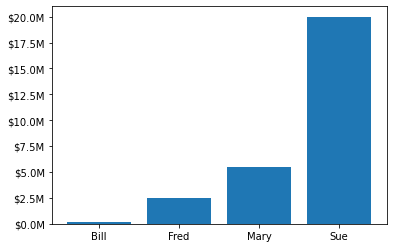

In [9]:
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]

def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f}M'.format(x*1e-6)

fig, ax = plt.subplots()
# Use automatic FuncFormatter creation
#ax.yaxis.set_major_formatter(millions)
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions))
ax.bar(['Bill', 'Fred', 'Mary', 'Sue'], money)
plt.show()

Text(0.5, 0, 'Diamond cut')

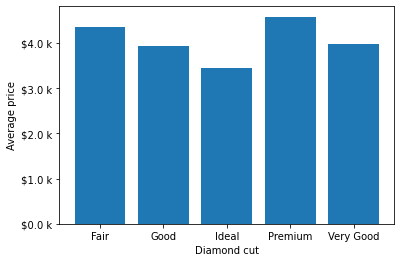

In [10]:
# Modify the demo for our purposes
def thousands(x, pos):
    """The two args are the value and tick position."""
    return '${:1.1f} k'.format(x*1e-3)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(plt.FuncFormatter(thousands))
ax.bar(average_price.index, average_price)
ax.set_ylabel("Average price")
ax.set_xlabel("Diamond cut")

## Another thing: the cuts are not ordered well.

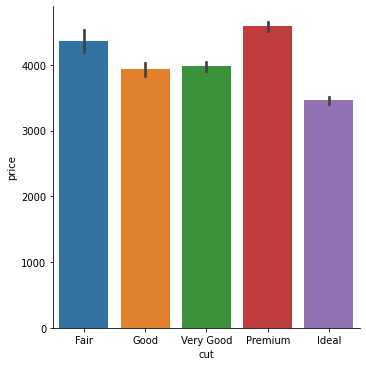

In [11]:
import seaborn as sns

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=diamonds, x="cut", y="price", kind="bar", order=cuts);

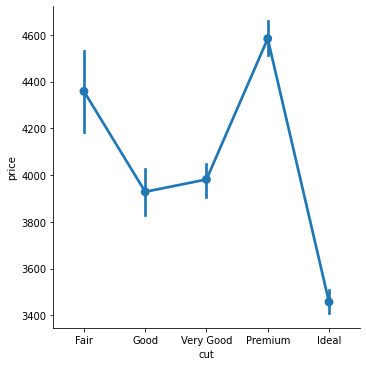

In [12]:
# Another visualization of the same data -- Q: Is this more informative?
import seaborn as sns

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=diamonds, x="cut", y="price", kind="point", order=cuts);

# Q: What have we learned (from the data)?

* Average price for "Very Good" cut is higher than "Ideal" or "Premium"?
* Possibly, but it depends on the nature of the average. 
  * For example, is the dataset "balanced"?
  * To answer this question, we need to know about the distributions (histograms)
* And other things impact price besides cut -- such as size (carat).

# Seaborn has some nice visualizations for EDA...

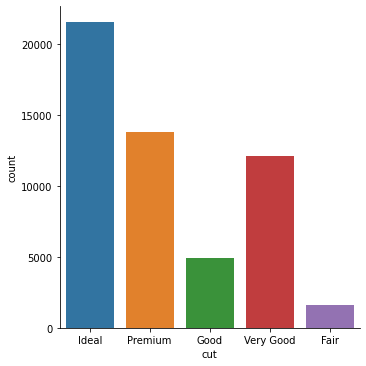

In [13]:
# Categorical -- diamond cut -- ideal is the most common
import seaborn as sns

sns.catplot(data=diamonds, x="cut", kind='count');

## What have you learned from the data?

* Different cuts have very different sample sizes.
* Many more "Ideal" diamonds than other cuts -- dataset is **not** "balanced"

## Q: What's wrong with the chart above?

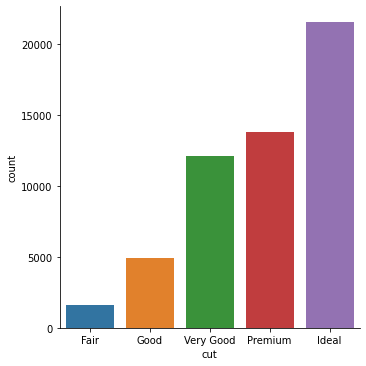

In [14]:
# Create a more informative plot by choosing a better ordering of the bars

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=diamonds, x="cut", kind='count', order=cuts);

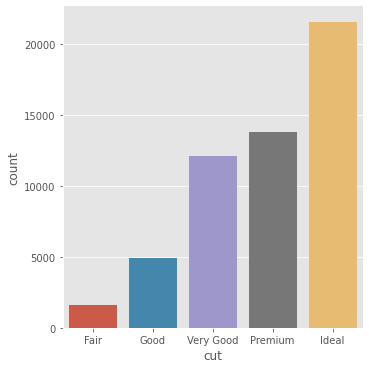

In [15]:
# Improve the styling
from matplotlib import pyplot as plt
plt.style.use('ggplot')

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=diamonds, x="cut", kind='count', order=cuts);

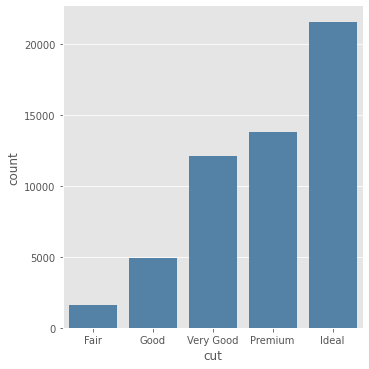

In [16]:
# Nix the colors -- they don't add value/information, possibly distracting
from matplotlib import pyplot as plt

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=diamonds, x="cut", kind='count', order=cuts, color="steelblue");

## Q: What about the distribution of price?

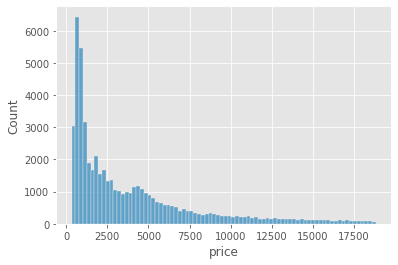

In [17]:
# Quantitative histogram -- diamond price
sns.histplot(data=diamonds, x="price");

## Heavily right-skewed distribution -- high-priced diamonds are less common

## Q: What about size (carat)?

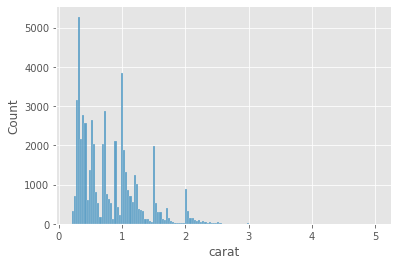

In [18]:
# Quantitative histogram -- diamond weight (carats -- 200 mg)
# Right-skewed distribution -- high priced diamonds less common
sns.histplot(data=diamonds, x="carat");

## Q: What about those spikes?

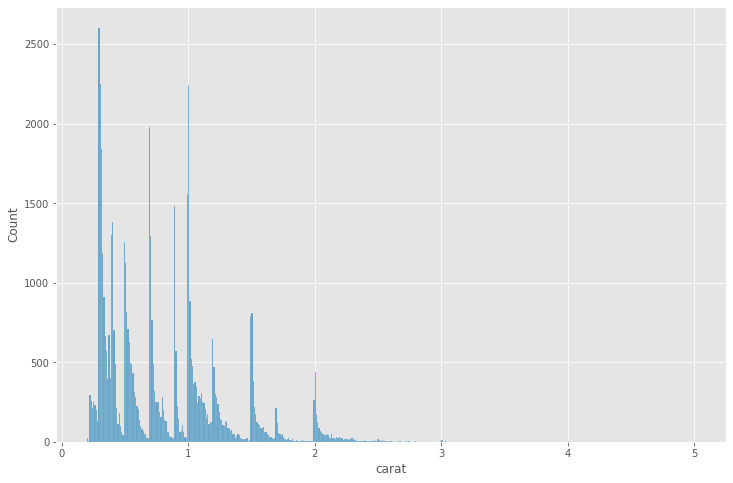

In [19]:
# Zoom in to get a better idea of what's going on:
# 1. Increase the figure size (with matplotlib API)
# 2. Increase bin resolution
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=diamonds, x="carat", binwidth=.01, ax=ax);

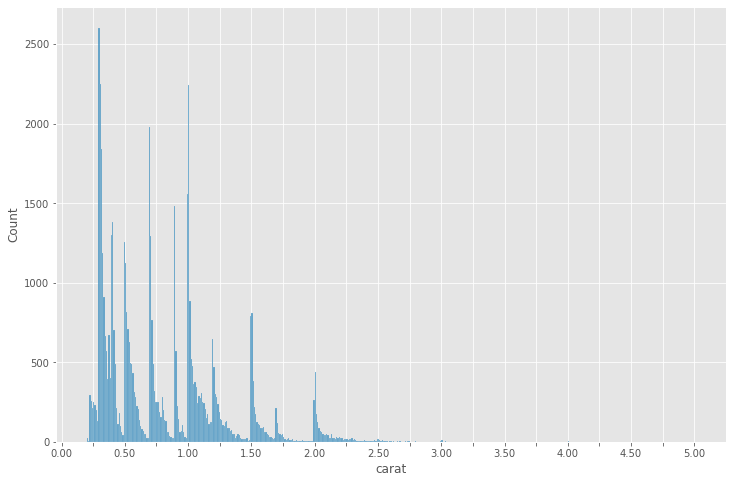

In [20]:
# Add some more context (with tick marks) to the visualization
fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=diamonds, x="carat", binwidth=.01, ax=ax);

ax.set_xticks(np.arange(0, 5.25, .25));
# ax.set_xticks(np.arange(0, 5.2, .1));
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

# Q: Why is the x-axis so large?

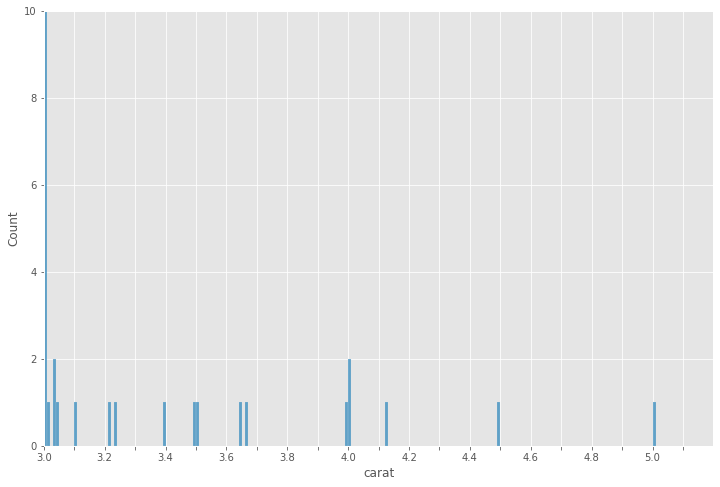

In [21]:
# We're using the default axis limits.
# Zoom in a bit more to see if there may be some outliers
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(data=diamonds, x="carat", binwidth=.01, ax=ax)
ax.set_xlim(3, 5.2)
ax.set_ylim(0, 10)
ax.set_xticks(np.arange(3, 5.2, .1));
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

# Q: Are high quality diamonds really less expensive?

Let's investigate the distribution there as well...

Note: We'll keep the colors here, since we'll use them in subsequent plots and keep them consistent.

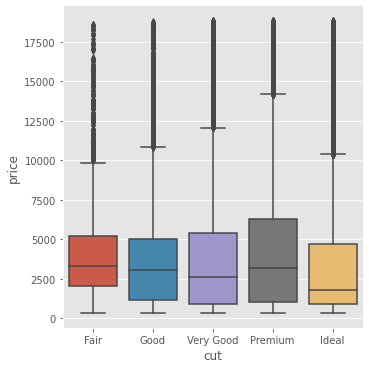

In [22]:
# High quality diamonds are less expensive?

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(x="cut", y="price", kind="box", data=diamonds, order=cuts);

# EXERCISE

Add custom labels for the tick marks on the y-axis showing units.

# What have we learned?

* The distribution of price is also highly skewed for each of the diamond cuts
   * That's likely to explain the price-quality question.
* What about size?

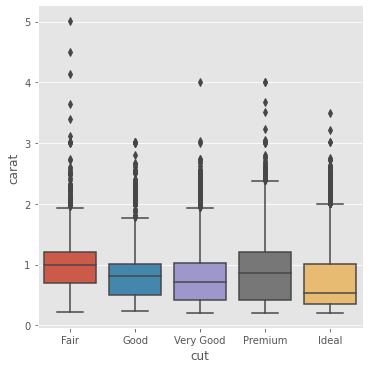

In [23]:
# High quality diamonds are smaller

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(x="cut", y="carat", kind="box", data=diamonds, order=cuts);

# What about price vs size?

Two quantitative measures.


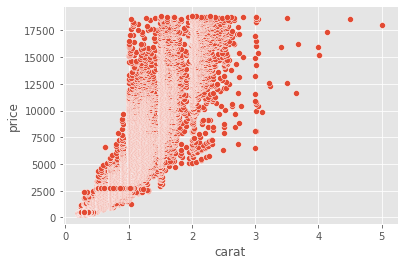

In [24]:
sns.scatterplot(data = diamonds, x="carat", y="price");

# Q: What's wrong with the visualization above?

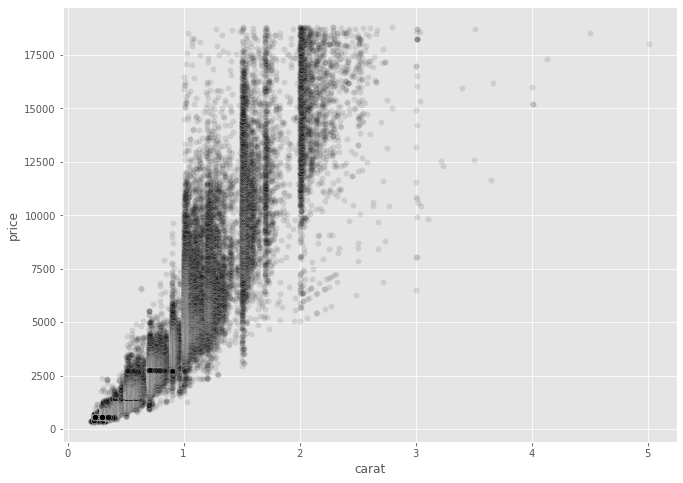

In [25]:
# There's a lot of data -- increase transparency to get a better visualization
# Alpha channel (RGBA representation of color) is opacity, 1=opaque (default)
# 0=transparent
sns.scatterplot(x="carat", y="price", data=diamonds, alpha=.1, color="black")

# zoom in with figure size
fig = plt.gcf()
fig.set_size_inches(11, 8)

# Linear model

This is a preview of modeling topics later in the course.

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch10/images/10_01.png" width="500px">

Figure credit: Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 3rd Ed. Packt Publishing, 2019.

# Linear regression

* Consider [seaborn](https://seaborn.pydata.org/tutorial/regression.html) for exploratory data analysis (EDA)
    * [Visualizing data distributions](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial) (tutorial) -- pydata.org
    * [Visualizing regression models](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial) (tutorial) -- pydata.org
* Use [matplotlib](https://matplotlib.org/) for basic and customizable charts and visualization
    * Seaborn is based on matplotlib
* [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html) has a variety of algorithms
    * 
* [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) and [statsmodels](https://www.statsmodels.org/stable/index.html) have additional statistical tools



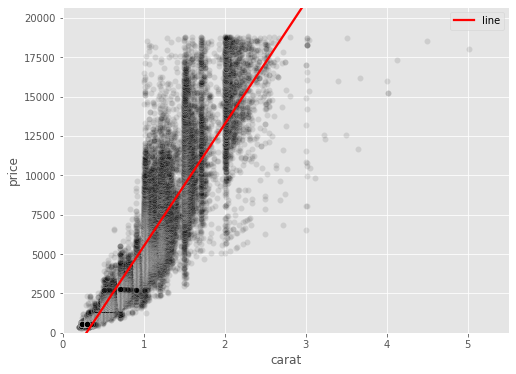

In [26]:
# Use the entire dataset (this cell takes ~30 seconds)
df = diamonds

# For styling, see: https://seaborn.pydata.org/generated/seaborn.regplot.html
line_kws = {'color':'red'}

# Least squares line and polynomial
sns.scatterplot(x="carat", y="price", data=df, alpha=.1, color="black")
sns.regplot(x="carat", y="price", data=df, order=0, scatter=False, line_kws=line_kws, label="line")

# figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# axis limits and legend
fig.gca().legend()
fig.gca().set_ylim([0, 1.1 * df['price'].max()]);
fig.gca().set_xlim([0, 1.1 * df['carat'].max()]);

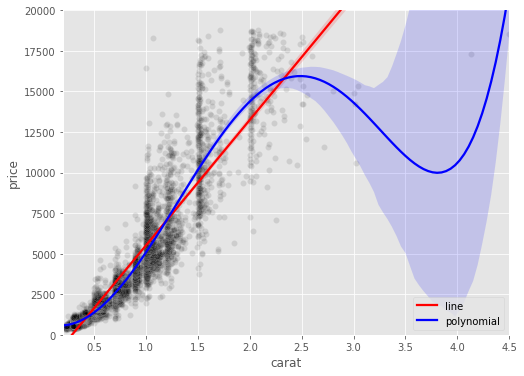

In [27]:
# Use the entire dataset (this cell takes ~30 seconds)
df = diamonds

# Subsample the data (this runs in ~2 seconds)
df = df.iloc[::10, :]

# For styling, see: https://seaborn.pydata.org/generated/seaborn.regplot.html
line_kws = {'color':'red'}
curve_kws = {'color': 'blue'}

# Least squares line and polynomial
sns.scatterplot(x="carat", y="price", data=df, alpha=.1, color="black")
sns.regplot(x="carat", y="price", data=df, order=0, scatter=False, line_kws=line_kws, label="line")
sns.regplot(x="carat", y="price", data=df, order=5, scatter=False, line_kws=curve_kws, label="polynomial")

# figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# axis limits and legend
fig.gca().legend()
fig.gca().set_ylim([0, 20100]);

# Logarithmic dependency?

* Clearly there's structure in the residuals -- is it logarithmic?
* `seaborn.regplot` has a `logx=True` parameter
    * Seaborn performs linear regression is `y ~ log(x)`
    * the scatterplot and regression model plots are linear in `x`

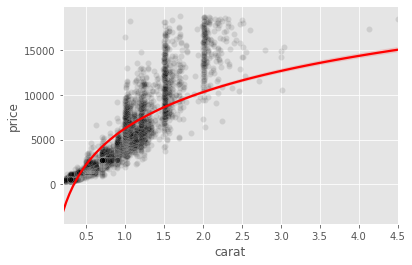

In [28]:
sns.scatterplot(x="carat", y="price", data=df, alpha=.1, color="black")
sns.regplot(x="carat", y="price", data=df, logx=True, scatter=False, line_kws=line_kws)
plt.show()

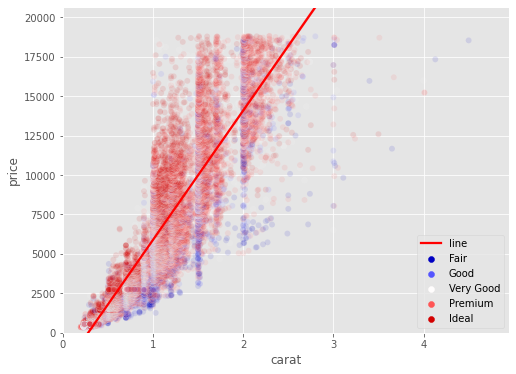

In [29]:
# Scatterplot -- use a diverging color scale for "cut"

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

ax = sns.scatterplot(x="carat", y="price", data=diamonds, alpha=.1, hue='cut', palette="seismic", hue_order=cuts)

red_kws = {'color':'red'}

# Least-squares line
sns.regplot(x="carat", y="price", data=diamonds[diamonds['cut'] == 'Ideal'], 
            line_kws=red_kws, order=0, scatter=False, label='line')


# figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# axis limits and legend
fig.gca().legend()
fig.gca().set_ylim([0, 1.1 * df['price'].max()]);
fig.gca().set_xlim([0, 1.1 * df['carat'].max()]);

ax.legend();

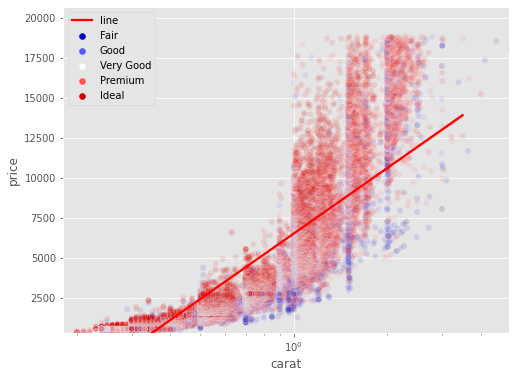

In [30]:
# Scatterplot -- use a diverging color scale for "cut"

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

ax = sns.scatterplot(x="carat", y="price", data=diamonds, alpha=.1, hue='cut', palette="seismic", hue_order=cuts)
ax.set_xscale('log')

red_kws = {'color':'red'}

# Least-squares line
sns.regplot(x="carat", y="price", data=diamonds[diamonds['cut'] == 'Ideal'], 
            line_kws=red_kws, logx=True, order=0, scatter=False, label='line')

# figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# axis limits and legend
fig.gca().legend()
fig.gca().set_ylim([0.9 * df['price'].min(), 1.1 * df['price'].max()]);
fig.gca().set_xlim([0.9 * df['carat'].min(), 1.1 * df['carat'].max()]);

ax.legend();



# 2-D Histograms

* Plots at bottom of this link have compelling visualizations (2-D histograms)
* https://seaborn.pydata.org/generated/seaborn.histplot.html

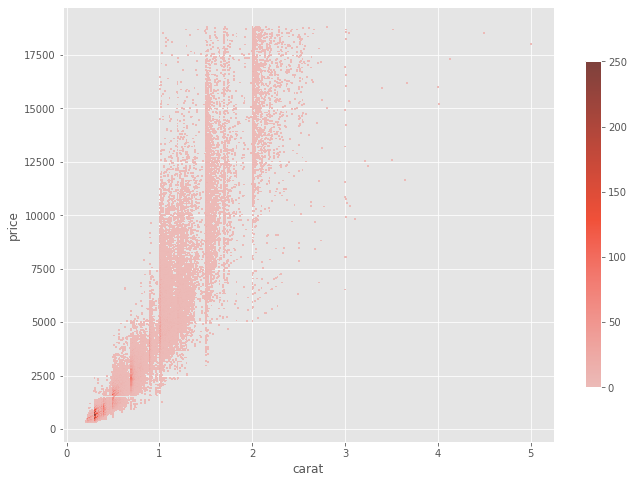

In [31]:
# 2-D histogram (price vs carat)
# clearly shows high concentration near origin
# but not much else
sns.histplot(
    diamonds, x="carat", y="price", cbar=True, cbar_kws=dict(shrink=.75), bins=500
)

fig = plt.gcf()
fig.set_size_inches(11, 8)

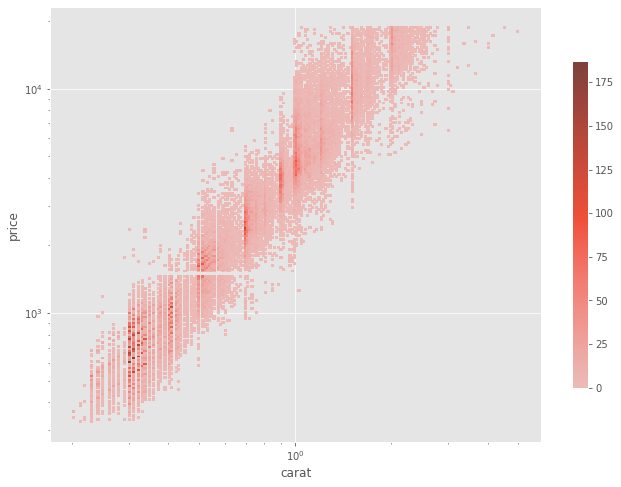

In [32]:
# 2-D histogram with log-log scale
# log scales add a lot of additional information:
# 1. clustering near some of of the tick marks for mass (carats)
# 2. linear relationship with logarithmic scaling
sns.histplot(
    diamonds, x="carat", y="price", cbar=True, cbar_kws=dict(shrink=.75),
    bins=200,
    log_scale=(True, True)
);

fig = plt.gcf()
fig.set_size_inches(11, 8)

In [33]:
diamonds['price'].min()
diamonds['price'].max()

18823

https://seaborn.pydata.org/tutorial/color_palettes.html

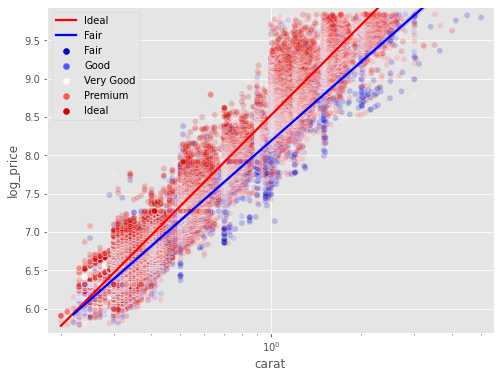

In [34]:
# Create a column of log(price)
df = diamonds
df['log_price'] = np.log(df['price'])

# Scatterplot -- use a diverging color scale for "cut"
ax = sns.scatterplot(x="carat", y="log_price", data=df, alpha=.2, hue='cut', palette="seismic", hue_order=cuts)
ax.set_xscale('log')
# ax.set_yscale('log')

# For styling, see: https://seaborn.pydata.org/generated/seaborn.regplot.html
red_kws = {'color':'red'}
blue_kws = {'color':'blue'}

# Least-squares line
sns.regplot(x="carat", y="log_price", data=df[df['cut'] == 'Ideal'], logx=True, line_kws=red_kws, order=0, scatter=False, label='Ideal')
sns.regplot(x="carat", y="log_price", data=df[df['cut'] == 'Fair'], logx=True, line_kws=blue_kws, order=0, scatter=False, label='Fair')

# set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# add the legend and set axis limits
fig.gca().legend();
fig.gca().set_xlim([ 0.9 * df['carat'].min(), 1.1 * df['carat'].max()]);
fig.gca().set_ylim([ np.log(0.9 * df['price'].min()), np.log(1.1 * df['price'].max())]);